In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cell_samples.csv')
df
#benign (value = 2) or malignant (value = 4)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


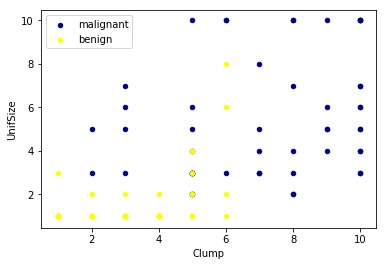

In [7]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

In [9]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [10]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

C:\Users\Atul\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [11]:
x = np.asanyarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']])
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [13]:
y = np.asanyarray(df['Class'].astype('int'))
y[0:5]

array([2, 2, 2, 2, 2])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print("Train test:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train test: (546, 9) (546,)
Test set: (137, 9) (137,)


In [15]:
#radial basis function
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

C:\Users\Atul\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pre = clf.predict(x_test)
pd.DataFrame(y_pre)

,0
0,2
1,4
2,2
3,4
4,2
5,2
6,2
7,2
8,4
9,2


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [21]:
print('Classification report:\n', classification_report(y_test, y_pre))

Classification report:
               precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [26]:
from sklearn.metrics import f1_score
x1 = f1_score(y_test, y_pre, average='weighted')
x1

0.9639038982104676

In [23]:
clf1 = svm.SVC(kernel='linear')
clf1.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pre1 = clf1.predict(x_test)
pd.DataFrame(y_pre1)

,0
0,2
1,4
2,2
3,4
4,2
5,2
6,2
7,2
8,4
9,2


In [36]:
x2 = f1_score(y_test, y_pre1, average='weighted')
x2

0.9639038982104676

In [33]:
clf2 = svm.SVC(kernel='poly')
clf2.fit(x_train, y_train)

C:\Users\Atul\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [46]:
y_pre2 = clf2.predict(x_test)
x3 = f1_score(y_test, y_pre2, average='weighted')
x3

0.9710669934861801

In [38]:
clf3 = svm.SVC(kernel='sigmoid')
clf3.fit(x_train, y_train)

C:\Users\Atul\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [47]:
y_pre3 = clf3.predict(x_test)
pd.DataFrame(y_pre3)
x4 = f1_score(y_test, y_pre3, average='weighted')
x4

0.3302620557616369

In [42]:
pd.DataFrame(y_pre3)

,0
0,2
1,2
2,2
3,2
4,4
5,2
6,4
7,2
8,2
9,2
